# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cars_hw.csv')

# Quick overview of the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

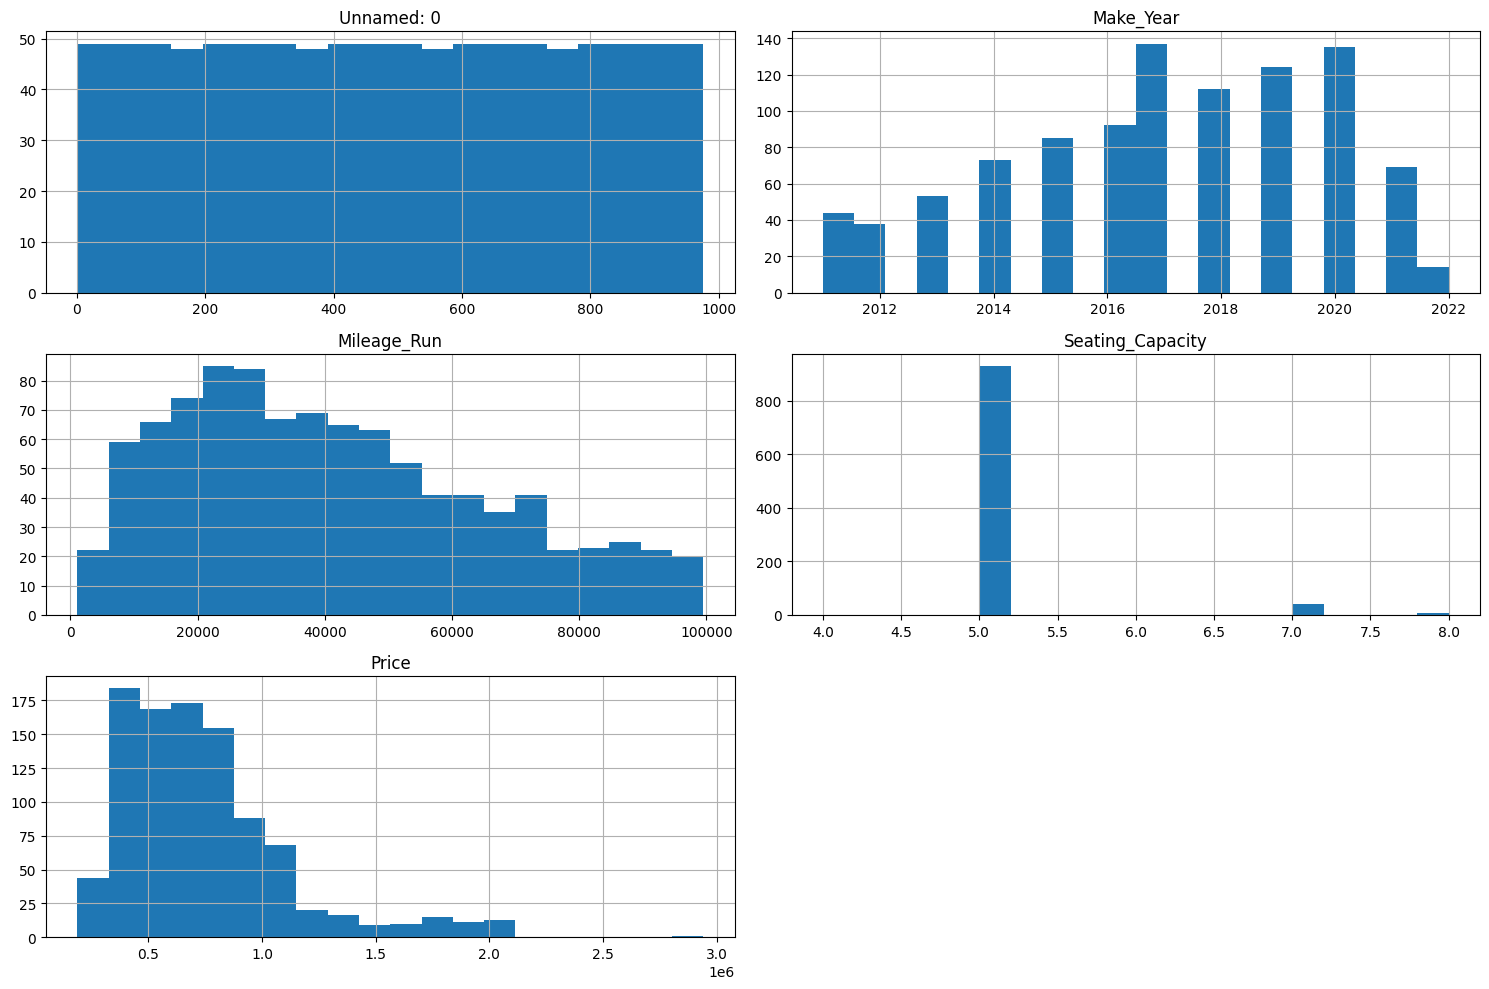

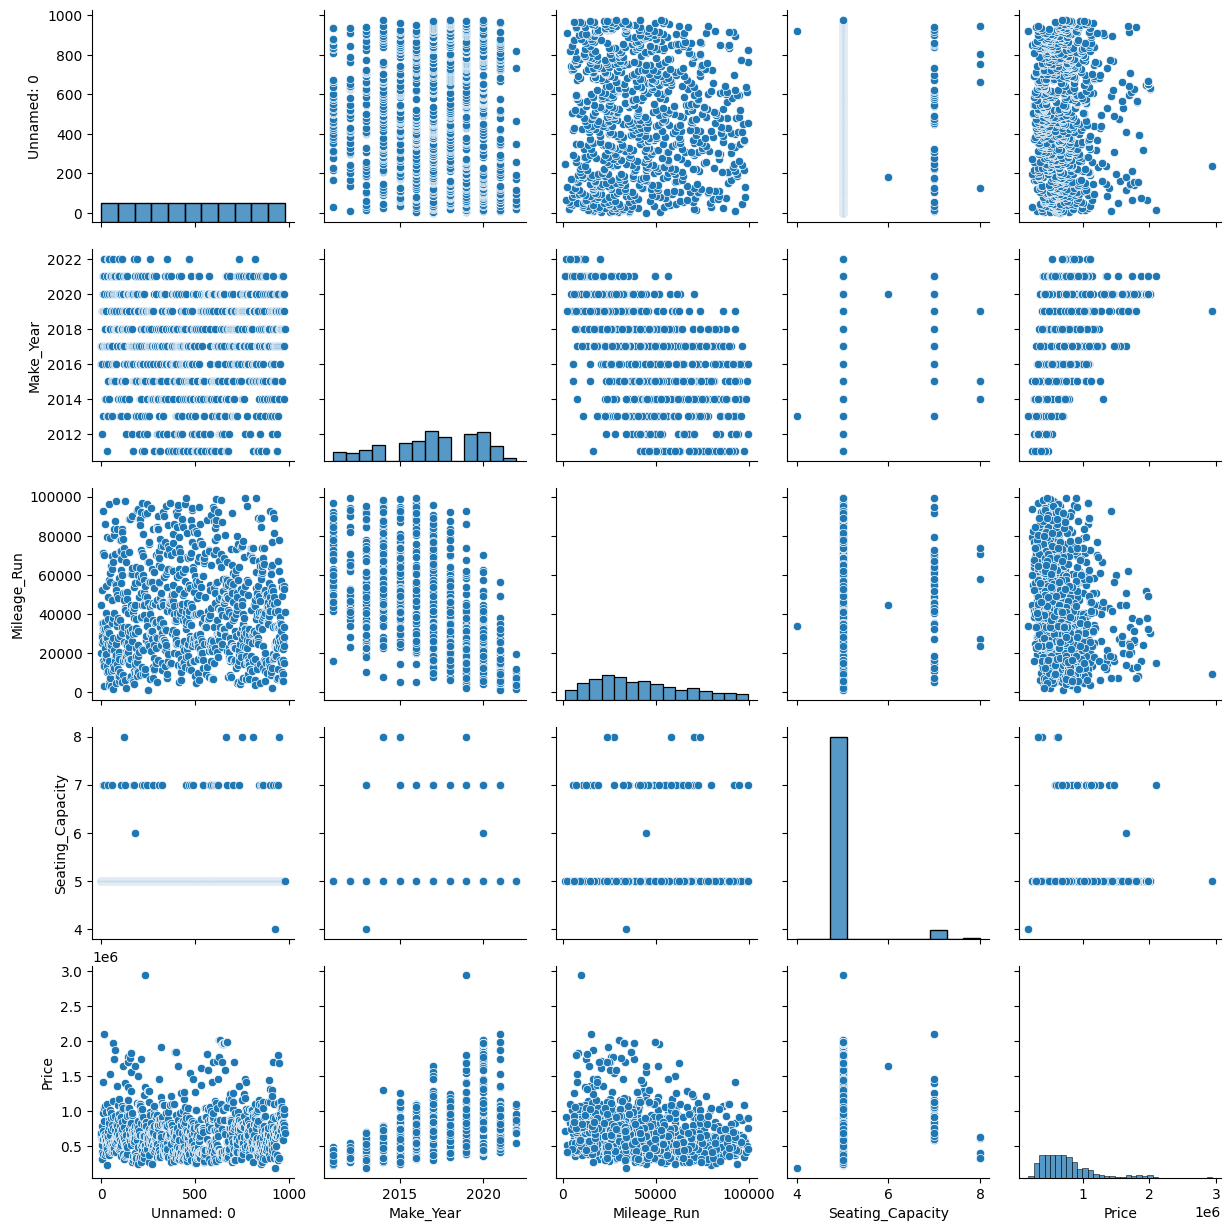

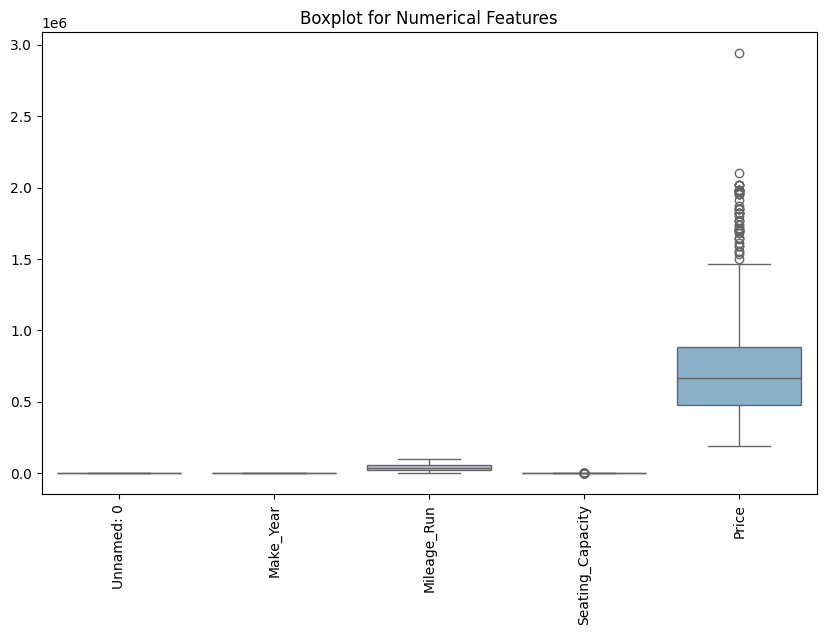

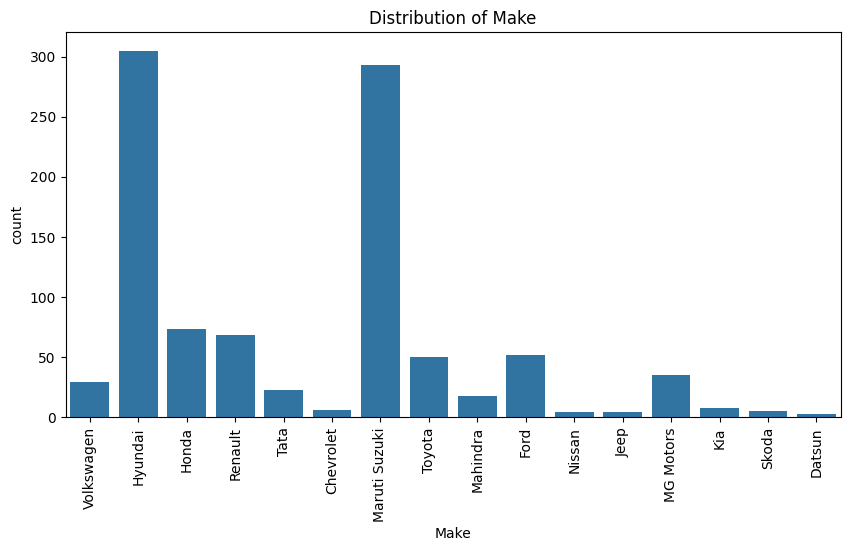

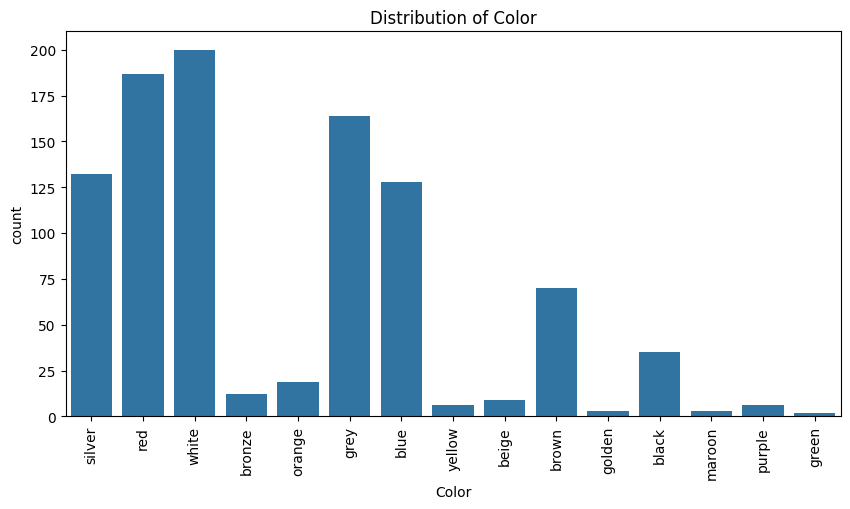

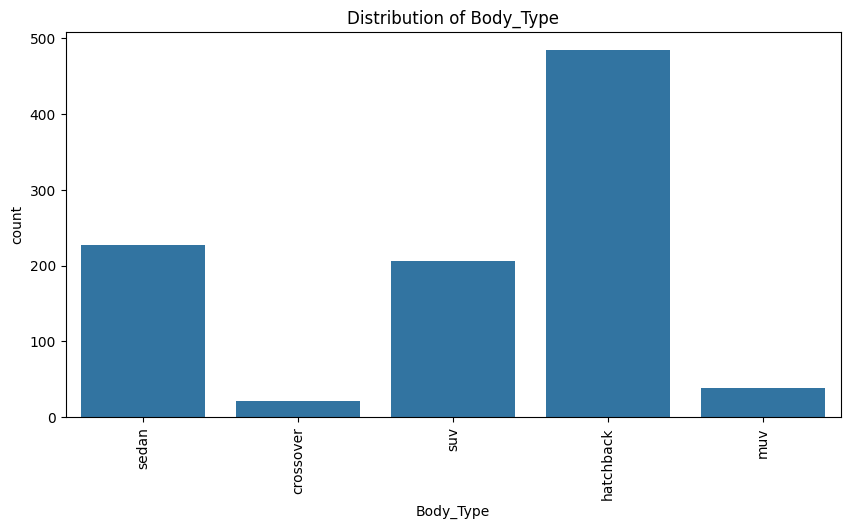

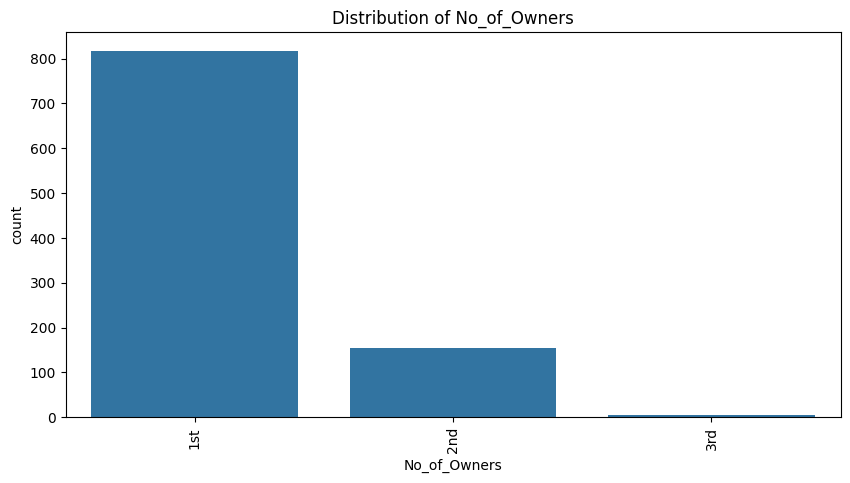

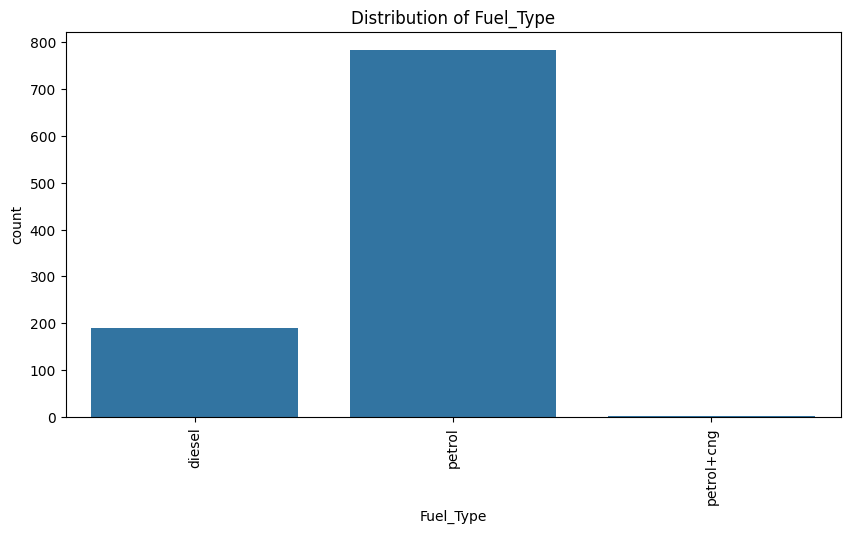

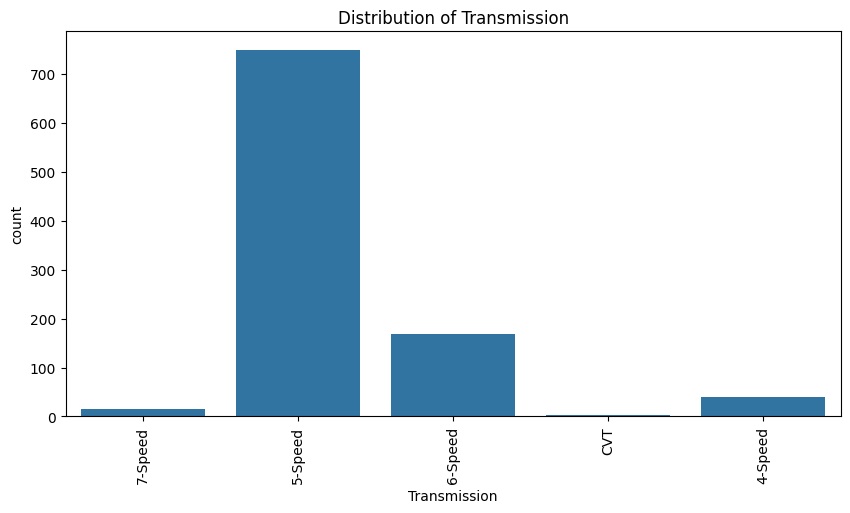

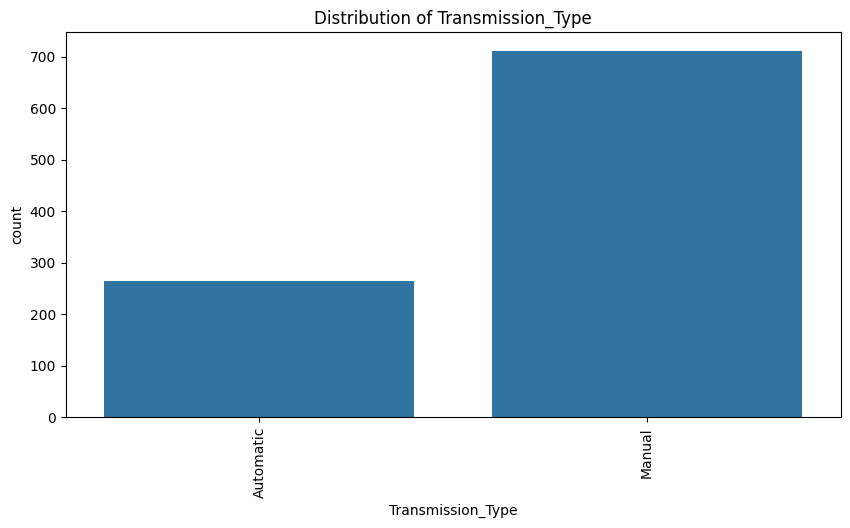

In [4]:
df = df.dropna()  # Simple approach: drop rows with missing data

# Visualize distributions of numeric features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


# Pairplot for numerical relationships (choose a subset of relevant variables if there are many)
sns.pairplot(df)
plt.show()

# Boxplot for detecting outliers in numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=np.number), palette="Set3")
plt.xticks(rotation=90)
plt.title('Boxplot for Numerical Features')
plt.show()

# Bar plot for categorical variables
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [5]:
df_transformed = pd.get_dummies(df, drop_first=True)



# Checking the transformed dataset
print(df_transformed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                976 non-null    int64
 1   Make_Year                 976 non-null    int64
 2   Mileage_Run               976 non-null    int64
 3   Seating_Capacity          976 non-null    int64
 4   Price                     976 non-null    int64
 5   Make_Datsun               976 non-null    bool 
 6   Make_Ford                 976 non-null    bool 
 7   Make_Honda                976 non-null    bool 
 8   Make_Hyundai              976 non-null    bool 
 9   Make_Jeep                 976 non-null    bool 
 10  Make_Kia                  976 non-null    bool 
 11  Make_MG Motors            976 non-null    bool 
 12  Make_Mahindra             976 non-null    bool 
 13  Make_Maruti Suzuki        976 non-null    bool 
 14  Make_Nissan               976 non-null    

In [6]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df_transformed.drop('target_column', axis=1)  # Replace 'target_column' with your target variable
y = df_transformed['target_column']

# Perform train-test split (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of the split datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

KeyError: "['target_column'] not found in axis"